### Chapter 01. 데이터 준비와 탐색

In [2]:
import csv

# 스트림 개방!
f = open('Fish.csv', 'r')
data = csv.reader(f)

header = next(data)

perch_weight = []
perch_length = []

for row in data:
    if row[0] == 'Perch':
        row[1] = float(row[1]) # 강제 형 변환 (str -> float)
        row[3] = float(row[3])
        
        perch_weight.append(row[1])
        perch_length.append(row[3])
# 스트림 폐쇄
f.close()

print('농어의 무게(y):', perch_weight)
print('농어의 길이(x):', perch_length)

농어의 무게(y): [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0]
농어의 길이(x): [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]


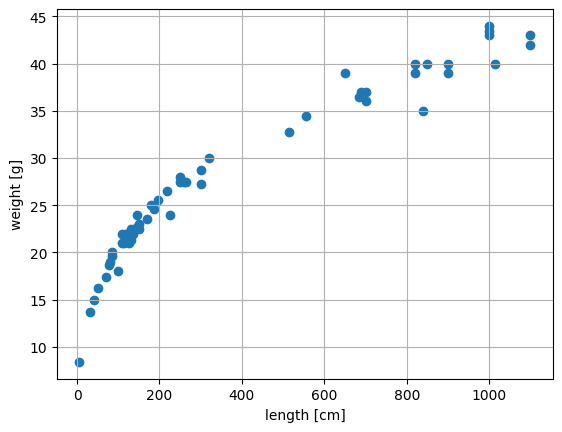

In [3]:
import matplotlib.pyplot as plt

# scatter plot(산점도) : 산포되어 있는 점들(Points)의 그림
plt.figure()
plt.scatter(perch_weight, perch_length)
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.grid(True)
plt.show()

# 물고기의 길이가 길어질수록 무게가 무겁다는 추측을 할 수 있다.


### Chapter 02. 데이터 전처리

In [4]:
import numpy as np

print("before:", type(perch_weight))

y = np.array(perch_weight)
x = np.array(perch_length)

print("after:", type(y)) # ndarray : n dimensional array

before: <class 'list'>
after: <class 'numpy.ndarray'>


In [5]:
print('x:' , x)
print('y:' , y)

# 쉼표가 사라졌음!

x: [ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
y: [   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


In [6]:
print(x.shape)
print(y.shape)
# 각각 몇 개의 원소를 담고있는지 알 수 있다.

(56,)
(56,)


#### 📌 학습용 & 시험용 데이터 세트로 분할해야함!
#### **scikit-learn (sklearn)**

> 1) Classification
> 2) Regression
> 3) Clusturing
> 4) Dimensionality Reduction
> 5) Model Selection
> 6) Pre.Processing

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(42,) (14,)
(42,) (14,)


In [8]:
x_train = x_train.reshape(42, 1)
print(x_train.shape)

(42, 1)


In [9]:
x_test = x_test.reshape(-1, 1)
print(x_test.shape)

(14, 1)


### Chapter 03. 선형 회귀

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 모델 학습
lr.fit(x_train, y_train)

x_new_length = [[50]]
y_pred = lr.predict(x_new_length)
print('길이가 50인 농어의 예측 무게:', y_pred)

길이가 50인 농어의 예측 무게: [1241.83860323]


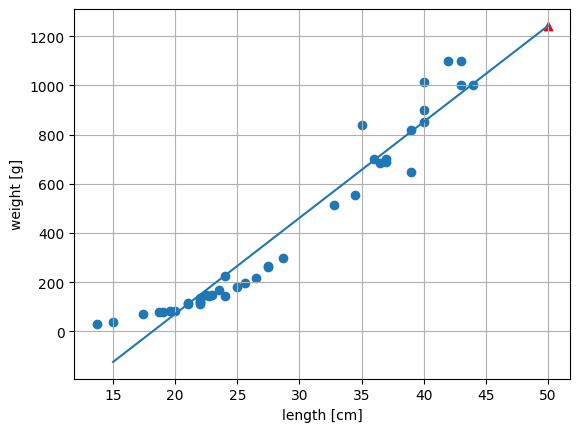

In [11]:
plt.figure()
plt.scatter(x_train, y_train)

plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^', color='red')
plt.xlabel('length [cm]')
plt.ylabel('weight [g]')
plt.grid(True)
plt.show()

In [12]:
print(lr.score(x_test, y_test))

0.8247503123313559


### Chapter 04. 다항 회귀

In [17]:
# 제곱 : X * * 2
x_train_poly = np.column_stack((x_train ** 2, x_train))
print(x_train_poly.shape)

(42, 2)


In [19]:
x_test_poly = np.column_stack((x_test ** 2, x_test))
print(x_test_poly.shape)

(14, 2)


In [20]:
lr = LinearRegression()

lr.fit(x_train_poly, y_train)

lr.predict([[50 ** 2, 50]])
print("길이가 50cm인 농어의 무게 예측값:", y_pred)

길이가 50cm인 농어의 무게 예측값: [1241.83860323]


In [26]:
# y = a * x^2 + b * x + c
# a, b -> coefficients -> coef_
# c -> y-intercept -> intercept_

print("a =", lr.coef_[0])
print("b =", lr.coef_[1])
print("c =", lr.intercept_)

a = lr.coef_[0]
b = lr.coef_[1]
c =  lr.intercept_

a = 1.0143321093767304
b = -21.557924978837352
c = 116.05021078278247


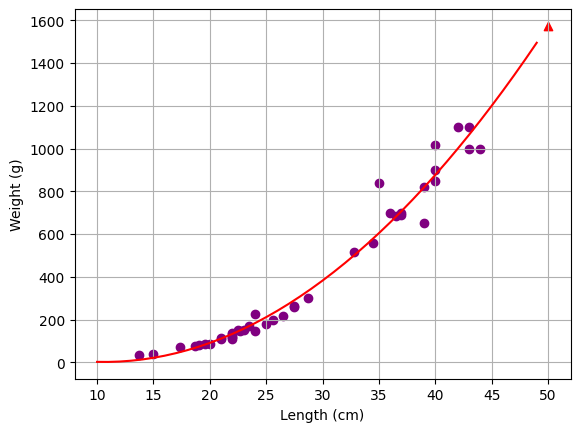

In [38]:
plt.figure()

point_x = np.arange(10, 50, 1) # (시작숫자, 끝숫자, 간격)
point_y = a * point_x ** 2 + b * point_x + c # ^ -> bitwise

plt.scatter(x_train, y_train, c='purple')

plt.plot(point_x, point_y, color='red')

plt.scatter(50, lr.predict([[50 ** 2, 50]]), marker='^', color='red')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.show()